# Vandermonde Method

## Univariate Polynomials

Consider a distinct set of $n + 1$ data points (no two $x_{j}$s are the same)
\begin{equation*}
(x_{0},y_{0}),~(x_{1},y_{1}),~(x_{2},y_{2})\ldots ,~(x_{n-1},y_{n-1}),~(x_{n},y_{n}),
\end{equation*}
where
\begin{equation}
g(x_i) =y_i,\quad \text{for }i = 1, 2, \ldots, n,
\end{equation}
for some $g\in C[a,b]$, and assume that
\begin{equation}
\mathcolorbox{green}{P_{n}(x) = c_0 + c_{1}x^{1} + \ldots+ c_{n-2}x^{n-2} +c_{n-1}x^{n-1}+ c_{n}x^{n}}
\end{equation}
interpolates these points. This means
\begin{equation}
P(x_i ) = y_i,\quad \text{for }i = 0, 1, 2, \ldots, n,
\end{equation}
In other words,
\begin{equation}
\begin{cases}
y_{0} = g(x_{0}) = \sum _{j=0}^{n}c_{j}x_{0}^{j} =
c_{0} + c_{1} x_{0} + c_{2} x_{0}^{2} + \ldots + c_{n}x_{0}^{n},\\
y_{1} = g(x_{1}) = \sum _{j=0}^{n}c_{j}x_{1}^{j}=
c_{0} + c_{1} x_{1} + c_{2} x_{1}^{2} + \ldots + c_{n}x_{1}^{n},\\
\vdots\\
y_{n-1} = g(x_{n-1}) = \sum _{j=0}^{n}c_{j}x_{n-1}^{j}= c_{0} + c_{1} x_{n-1} + c_{2} x_{n-1}^{2} + \ldots + c_{n}x_{n-1}^{n},\\
y_{n} = g(x_{n}) = \sum _{j=0}^{n}c_{j}x_{n}^{j}= c_{0} + c_{1} x_{n} + c_{2} x_{n}^{2} + \ldots + c_{n}x_{n}^{n}.
\end{cases}
\end{equation}
This can be expressed as the following linear system of equations,
\begin{equation}
\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots & x_{0}^{n}\\
1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{n}\\
1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{n}\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
1 & x_{n} & x_{n}^{2} & \dots & x_{n}^{n}
\end{bmatrix}
\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\\vdots\\c_{n}\end{bmatrix}=
\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix}.
\end{equation}
The matrix containing the values of the variables of the polynomial is called the \textbf{Vandermonde matrix}:
\begin{equation*}
\textbf{V}=\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots & x_{0}^{n}\\
1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{n}\\
1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{n}\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
1 & x_{n-1} & x_{n-1}^{2} & \dots & x_{n-1}^{n}\\
1 & x_{n} & x_{n}^{2} & \dots & x_{n}^{n}
\end{bmatrix}
\end{equation*}
Let $\textbf{c} = \begin{bmatrix}c_{0} & c_{1} & c_{2} & \dots & c_{n}\end{bmatrix}^T$
and $\textbf{y} = \begin{bmatrix}y_{0} & y_{1} & y_{2} & \dots &y_{n}\end{bmatrix}^T$. We can find $c_{0}$, $c_{1}$, $c_{2}$, \dots, $c_{n}$ by solving
\begin{equation}
\textbf{V}\textbf{c} = \textbf{y}
\end{equation}
for $\textbf{c}$.

<font color='Blue'><b>Example</b></font>:
Consider the data points $(-2,1)$, $(0,1)$, $(2,9)$, $(3,16)$ . Find an interpolating polynomial $p(x)$ of degree at most three, and estimate the value of $p(1)$.

<font color='Green'><b>Solution</b></font>:
We like to identify
\begin{equation*}
P_{3}(x) = c_0 +c_1 x+c_2 x^2 +c_{3} x^{3}
\end{equation*}
in a way that $P_{3}(-2)=1$, $P_{3}(0)=1$, $P_{3}(2)=9$ and $P_{3}(3)=16$.

We can substitute the known values in for $x$ and solve for $c_0$, $c_1$, $c_2$ and $c_3$. Using the given points, the system of equations is
\begin{align*}
&P_{3}(-2)=1 &\Rightarrow& & c_{0}-2\,c_{1}+4\,c_{2}-8\,c_{3}=1&\\
&P_{3}(0)=1 & \Rightarrow& & c_{0}=1&\\
&P_{3}(2)=9 & \Rightarrow& & c_{0}+2\,c_{1}+4\,c_{2}+8\,c_{3}=9&\\
&P_{3}(3)=16 & \Rightarrow& & c_{0}+3\,c_{1}+9\,c_{2}+27\,c_{3}=16&
\end{align*}
Observe that
\begin{equation*}
\left[\begin{array}{cccc}1 & -2 & 4 & -8 \\ 1 & 0 & 0 & 0 \\ 1 & 2 & 4 & 8 \\ 1 & 3 & 9 & 27 \end{array}\right]
\begin{bmatrix}c_{0}\\c_{1}\\c_{2} \\ c_{3}\end{bmatrix}
\begin{bmatrix}1\\1\\9 \\ 16\end{bmatrix}
\end{equation*}
The augmented matrix:
\begin{equation*}
\left[\begin{array}{cccc|c}
1 & -2 & 4 & -8 & 1\\ 1 & 0 & 0 & 0 & 1\\ 1 & 2 & 4 & 8 & 9\\ 1 & 3 & 9 & 27 & 16
\end{array}\right]
\end{equation*}
In Reduced Row Echelon Form (RREF):
\begin{equation*}
\left[\begin{array}{cccc|c}
1 & 0 & 0 & 0 & 1\\ 0 & 1 & 0 & 0 & 2\\ 0 & 0 & 1 & 0 & 1\\ 0 & 0 & 0 & 1 & 0
\end{array}\right]
\end{equation*}
Therefore, $c_0 = 1$, $c_1 = 2$ , $c_2 = 1$, $c_3 = 0$ and $P_{3}(x) = x^2+2\,x+1$ . To estimate the value of $p(1)$, we compute
\begin{equation*}
P_{3}(1) = (1)^2+2(1)+1= 4.
\end{equation*}

<center>
<iframe src="https://www.desmos.com/calculator/tpnftqinpd?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>
</center>

::::{tab-set}

:::{tab-item} Python Code
```python
import numpy as np

def VanderCoefs(xn, yn):
    '''
    xn : list/array
        DESCRIPTION. a list/array consisting points x0, x1, x2,... ,xn
    yn : list/array
        DESCRIPTION. a list/array consisting points
        y0 = f(x0), y1 = f(x1),... ,yn = f(xn)
    Returns
    -------
    cn : float
        DESCRIPTION. Vandermonde method coefficients
    '''
    n = len(xn)
    V = np.zeros((n, n), dtype = float)
    P = np.arange(n)
    for i in range(n):
        V[i, :] = xn[i]**P
    cn = np.linalg.solve(V, yn)
    return cn
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [cn] = VanderCoefs(xn, yn)
%{
xn : list/array
    DESCRIPTION. a list/array consisting points x0, x1, x2,... ,xn
yn : list/array
    DESCRIPTION. a list/array consisting points
    y0 = f(x0), y1 = f(x1),... ,yn = f(xn)
Returns
-------
cn : float
    DESCRIPTION. Vandermonde method coefficients
%}
n = length(xn);
V = zeros(n, n);
P = 0:(n-1);
for i = 1:n
    V(i, :) = xn(i).^P;
end
cn = linsolve(V,yn');
end
```
:::

::::

<font color='Blue'><b>Example</b></font>: In the previous Example, use **VanderCoefs** functions to identify Vandermonde method coefficients.

In [1]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

We use numpy [polyval](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html) to form a polynomial.

In [2]:
import numpy as np
from hd_Interpolation_Algorithms import VanderCoefs

# A set of distinct points
xn = np.array ([-2, 0, 2, 3])
yn = np.array ([1, 1, 9, 16])
# Vandermonde method coefficients
cn = VanderCoefs(xn, yn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = np.polyval(np.flip(cn), x)
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate Polynomials)')

## Univariate General Functions

In this method, instead of using just a polynomial, the desired functions $f_{n}$ can be used. Therefore, for a distinct set of $n + 1$ data points (no two $x_{j}$s are the same)
 \begin{equation*}
(x_{0},y_{0}),~(x_{1},y_{1}),~(x_{2},y_{2})\ldots ,~(x_{n-1},y_{n-1}),~(x_{n},y_{n}),
\end{equation*}
where
\begin{equation}
g(x_i) =y_i,\quad \text{for }i = 1, 2, \ldots, n,
\end{equation}
for some $g\in C[a,b]$, and the following general form,
\begin{equation}
{P(x) = \sum _{j=0}^{n}c_{j}f_j(x) =c_0f_0(x) + c_{1}f_1(x) + \ldots + c_{n-1}f_{n-1}(x)+ c_{n}f_{n}(x)}
\end{equation}
interpolates these points. This means $P(x_i ) = y_i$ for $i = 0, 1, 2, \ldots, n$. In other words,
\begin{equation}
\begin{cases}
y_{0} = g(x_{0}) = \sum _{j=0}^{n}c_{j}f_j(x_{0}) = c_{0}f_{0}(x_{0}) + c_{1}f_{1}(x_{0})+ \ldots + c_{n}f_{n}(x_{0}),\\
y_{1} = g(x_{1}) = \sum _{j=0}^{n}c_{j}f_j(x_{1}) = c_{0}f_{0}(x_{1}) + c_{1}f_{1}(x_{1})+ \ldots + c_{n}f_{n}(x_{1}),\\
\vdots\\
y_{n-1} = g(x_{n-1}) = \sum _{j=0}^{n}c_{j}f_j(x_{n-1}) = c_{0}f_{0}(x_{n-1}) + c_{1}f_{1}(x_{n-1})+ \ldots + c_{n}f_{n}(x_{n-1}),\\
y_{n} = g(x_{n}) = \sum _{j=0}^{n}c_{j}f_j(x_{n}) = c_{0}f_{0}(x_{n}) + c_{1}f_{1}(x_{n})+ \ldots + c_{n}f_{n}(x_{n}).
\end{cases}
\end{equation}

This can be expressed as a system of equations. Thus,
\begin{equation*}
\begin{bmatrix}
f_{0}(x_{0}) & f_{1}(x_{0}) & f_{2}(x_{0}) & \dots & f_{n}(x_{0})\\
f_{0}(x_{1}) & f_{1}(x_{1}) & f_{2}(x_{1}) & \dots & f_{n}(x_{1})\\
f_{0}(x_{2}) & f_{1}(x_{2}) & f_{2}(x_{2}) & \dots & f_{n}(x_{2})\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n}) & f_{1}(x_{n}) & f_{2}(x_{n}) & \dots & f_{n}(x_{n})\\
\end{bmatrix}
\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\ \vdots\\c_{n}\end{bmatrix}=
\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n}\end{bmatrix},
\end{equation*}
and the Vandermonde Matrix:
\begin{equation*}
\textbf{V} = \begin{bmatrix}
f_{0}(x_{0}) & f_{1}(x_{0}) & f_{2}(x_{0}) & \dots & f_{n}(x_{0})\\
f_{0}(x_{1}) & f_{1}(x_{1}) & f_{2}(x_{1}) & \dots & f_{n}(x_{1})\\
f_{0}(x_{2}) & f_{1}(x_{2}) & f_{2}(x_{2}) & \dots & f_{n}(x_{2})\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n}) & f_{1}(x_{n}) & f_{2}(x_{n}) & \dots & f_{n}(x_{n})\\
\end{bmatrix}
\end{equation*}

::::{tab-set}

:::{tab-item} Python Code
```python
def VanderCoefsGen(xn, yn, fn = False):
    '''
    xn : list/array
        DESCRIPTION. a list/array consisting points x0, x1, x2,... ,xn
    yn : list/array
        DESCRIPTION. a list/array consisting points
        y0 = f(x0), y1 = f(x1),... ,yn = f(xn)
    fn : a multi-output function
        base-functions for Vandermonde method
    Returns
    -------
    cn : float
        DESCRIPTION. Vandermonde method coefficients
    '''
    if not fn:
        fn = lambda x: x**np.arange(len(xn))
    n = len(xn)
    V = np.zeros((n, n), dtype = float)
    for i in range(n):
        V[i, :] = fn(xn[i])
    cn = np.linalg.solve(V, yn)
    return cn
```
:::

:::{tab-item} MATLAB Code
```MATLAB

```
:::

::::

<font color='Blue'><b>Example</b></font>: Consider the following data points
\begin{align*}
\{(1,-3),~(2,0),~(3,-1),~(4,2),~(5,1),~(6,4)\}.
\end{align*}
Construct an interpolating polynomial using Vandermonde method coefficients that use all this data. For $f_n$ functions use

* a) $\left\{1,~x,x^2,\ldots,x^n\right\}$ as $f_n$ functions,
* b) $\left\{\cos(x),~\cos(2x),~\cos(3x),\ldots,~\cos(nx)\right\}$ as $f_n$ functions.

<font color='Green'><b>Solution</b></font>:

a.
This would be similar to the method discussed in Section \ref{Vandermonde_Univar}. Note that here $n=5$, and the Vandermonde matrix corresponding to $\left\{1,~x,~x^2,~x^3,~x^4,~x^5 \right\}$ can be found as follows,
\begin{equation*}
\textbf{V} =
\begin{bmatrix}
1 & x_{0} & x_{0}^{2} &  x_{0}^{3} &  x_{0}^{4} &  x_{0}^{5}\\
1 & x_{1} & x_{1}^{2} &  x_{1}^{3} &  x_{1}^{4} &  x_{1}^{5}\\
1 & x_{2} & x_{2}^{2} &  x_{2}^{3} &  x_{2}^{4} &  x_{2}^{5}\\
1 & x_{3} & x_{3}^{2} &  x_{3}^{3} &  x_{3}^{4} &  x_{3}^{5}\\
1 & x_{4} & x_{4}^{2} &  x_{4}^{3} &  x_{4}^{4} &  x_{4}^{5}\\
1 & x_{5} & x_{5}^{2} &  x_{5}^{3} &  x_{5}^{4} &  x_{5}^{5}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1\\1 & 2 & 4 & 8 & 16 & 32\\1 & 3 & 9 & 27 & 81 & 243\\1 & 4 & 16 & 64 & 256 & 1024\\1 & 5 & 25 & 125 & 625 & 3125\\1 & 6 & 36 & 216 & 1296 & 7776
\end{bmatrix}
\quad \text{and} \quad
\textbf{y} =
\begin{bmatrix}
-3\\0\\-1\\2\\1\\4
\end{bmatrix}
\end{equation*}
Now, we can solve $\textbf{V}\textbf{c} = \textbf{y}$ to find $\textbf{c}$. Therefore,
\begin{equation*}
\textbf{c} = \textbf{V}^{-1}y = \left[\begin{array}{cccccc} -66.0 & 130.07 & -93.33 & 30.67 & -4.67 & 0.27 \end{array}\right]^T.
\end{equation*}
Therefore,
\begin{equation*}
{P(x) = 0.27 x^{5} - 4.67 x^{4} + 30.67 x^{3} - 93.33 x^{2} + 130.07 x - 66.0.}
\end{equation*}

b.
In this case, we have,
\begin{align*}
\textbf{V} &=
\begin{bmatrix}
1 & \cos(x_{0}) & \cos(2\,x_{0}) & \cos(3\,x_{0}) & \cos(4\,x_{0}) & \cos(5\,x_{0})\\
1 & \cos(x_{1}) & \cos(2\,x_{1}) & \cos(3\,x_{1}) & \cos(4\,x_{1}) & \cos(5\,x_{1})\\
1 & \cos(x_{2}) & \cos(2\,x_{2}) & \cos(3\,x_{2}) & \cos(4\,x_{2}) & \cos(5\,x_{2})\\
1 & \cos(x_{3}) & \cos(2\,x_{3}) & \cos(3\,x_{3}) & \cos(4\,x_{3}) & \cos(5\,x_{3})\\
1 & \cos(x_{4}) & \cos(2\,x_{4}) & \cos(3\,x_{4}) & \cos(4\,x_{4}) & \cos(5\,x_{4})\\
1 & \cos(x_{5}) & \cos(2\,x_{5}) & \cos(3\,x_{5}) & \cos(4\,x_{0}) & \cos(5\,x_{5})\\
\end{bmatrix}
\\
&=
\begin{bmatrix}
1.0 & 0.54 & -0.42 & -0.99 & -0.65 & 0.28\\1.0 & -0.42 & -0.65 & 0.96 & -0.15 & -0.84\\1.0 & -0.99 & 0.96 & -0.91 & 0.84 & -0.76\\1.0 & -0.65 & -0.15 & 0.84 & -0.96 & 0.41\\1.0 & 0.28 & -0.84 & -0.76 & 0.41 & 0.99\\1.0 & 0.96 & 0.84 & 0.66 & 0.42 & 0.15
\end{bmatrix}
\quad \text{and}\quad
\textbf{y} =
\begin{bmatrix}
-3\\0\\-1\\2\\1\\4
\end{bmatrix}.
\end{align*}
Using $\textbf{V}\textbf{c} = \textbf{y}$, we can find $\textbf{c}$ as follows (using $\textbf{c} = \textbf{V}^{-1}y$):
\begin{equation*}
\textbf{c} =
\left[\begin{array}{cccccc} 0.54 & -0.25 & 1.0 & 2.55 & 1.83 & 2.58 \end{array}\right]^T
\end{equation*}
\vspace{-0.5cm}
Therefore,
\begin{equation*}
{P(x) = 0.54 -0.25\,\cos(x) + \cos(2\,x) + 2.55\,\cos(3\,x) + 1.83\,\cos(4\,x) + 2.58\,\cos(5\,x).}
\end{equation*}

We can also try parts (a) and (b) of this Example in Python.

In [3]:
from hd_Interpolation_Algorithms import VanderCoefsGen

# A set of distinct points
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
# Vandermonde method coefficients
cn = VanderCoefsGen(xn, yn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = np.polyval(np.flip(cn), x)
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate Polynomials)')

For the above example, we can use $\left\{\cos(x),~\cos(2x),~\cos(3x),\ldots,~\cos(nx)\right\}$ as $f_n$ functions and use the Vandermonde Method.

In [4]:
# A set of distinct points
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
fn = lambda x: np.array([np.cos(n*x) for n in range(len(xn))])
# Vandermonde method coefficients
cn = VanderCoefsGen(xn, yn, fn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = (cn.reshape(1, len(cn))@fn(x)).flatten()
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate General Functions)')

## Multivariate General Functions

Vandermonde's method can be extended for the interpolation of multidimensional functions. For example, in three-dimensional space, for distinct points
\begin{equation*}
(x_{0},y_{0},z_{0}),~(x_{1},y_{1},z_{1}),~(x_{2},y_{2},z_{2})\ldots ,~(x_{n-1},y_{n-1},z_{n-1}) ,~(x_{n},y_{n},z_{n}),
\end{equation*}
we have
\begin{equation*}
{P(x,y) = \sum _{j=0}^{n}c_{j}f_j(x, y)},
\end{equation*}
where $f_{n}$ are desired functions. Similarly, we can form a linear system to find $c_{0}$, $c_{1}$,\dots $c_{n}$. Thus,
\begin{equation*}
z_{i} = f(x_{i}, y_{i}) = \sum _{j=0}^{n}c_{j}f_j(x_{i}, y_{i}),\quad 0\leq i \leq n,
\end{equation*}
which means,
\begin{equation}
\begin{cases}
z_{0} = c_{0}f_{0}(x_{0}, y_{0}) +  c_{1}f_{1}(x_{0}, y_{0}) + \dots +  c_{n}f_{n}(x_{0}, y_{0}),\\
z_{1} = c_{0}f_{0}(x_{1}, y_{1}) +  c_{1}f_{1}(x_{1}, y_{1}) + \dots +  c_{n}f_{n}(x_{1}, y_{1}),\\
\vdots\\
z_{n-1} = c_{0}f_{0}(x_{n-1}, y_{n-1}) +  c_{1}f_{1}(x_{n-1}, y_{n-1}) + \dots +  c_{n}f_{n}(x_{n-1}, y_{n-1}),\\
z_{n} = c_{0}f_{0}(x_{n}, y_{n}) +  c_{1}f_{1}(x_{n}, y_{n}) + \dots +  c_{n}f_{n}(x_{n}, y_{n}).
\end{cases}
\end{equation}
This can be expressed as a system of equations. Thus,
\begin{equation*}
\begin{bmatrix}
f_{0}(x_{0}, y_{0}) & f_{1}(x_{0}, y_{0}) & f_{2}(x_{0}, y_{0}) & \dots & f_{n}(x_{0}, y_{0})\\
f_{0}(x_{1}, y_{1}) & f_{1}(x_{1}, y_{1}) & f_{2}(x_{1}, y_{1}) & \dots & f_{n}(x_{1}, y_{1})\\
f_{0}(x_{2}, y_{2}) & f_{1}(x_{2}, y_{2})) & f_{2}(x_{2}, y_{2})) & \dots & f_{n}(x_{2}, y_{2}))\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n}, y_{n}) & f_{1}(x_{n}, y_{n}) & f_{2}(x_{n}, y_{n}) & \dots & f_{n}(x_{n}, y_{n})\\
\end{bmatrix}\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\\vdots\\c_{n}\end{bmatrix}=
\begin{bmatrix}z_{0}\\z_{1}\\z_{2}\\\vdots\\z_{n}\end{bmatrix},
\end{equation*}
and the Vandermonde Matrix:
\begin{equation*}
\textbf{V} = \begin{bmatrix}
f_{0}(x_{0}, y_{0}) & f_{1}(x_{0}, y_{0}) & f_{2}(x_{0}, y_{0}) & \dots & f_{n}(x_{0}, y_{0})\\
f_{0}(x_{1}, y_{1}) & f_{1}(x_{1}, y_{1}) & f_{2}(x_{1}, y_{1}) & \dots & f_{n}(x_{1}, y_{1})\\
f_{0}(x_{2}, y_{2}) & f_{1}(x_{2}, y_{2})) & f_{2}(x_{2}, y_{2})) & \dots & f_{n}(x_{2}, y_{2}))\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n}, y_{n}) & f_{1}(x_{n}, y_{n}) & f_{2}(x_{n}, y_{n}) & \dots & f_{n}(x_{n}, y_{n})\\
\end{bmatrix}
\end{equation*}

::::{tab-set}

:::{tab-item} Python Code
```python
def VanderCoefs3D(xn, yn, zn, fn):
    '''
    Parameters
    ----------
    xn : list/array
        DESCRIPTION. a list/array consisting points x0, x1, x2,... ,xn
    yn : list/array
        DESCRIPTION. a list/array consisting points y0, y1,... ,yn
    zn : list/array
        DESCRIPTION. a list/array consisting points
        z0 = f(x0,y0), z1 = f(x1,y1),... ,zn = f(xn,yn)
    fn : a multi-output function
        base-functions for Vandermonde method
    Returns
    -------
    cn : float
        DESCRIPTION. Vandermonde method coefficients

    '''
    V = np.zeros((len(xn), len(xn)), dtype = float)
    for i in range(len(xn)):
        V[i, :] = fn(xn[i], yn[i])
    cn = np.linalg.solve(V, zn)
    return cn

```
:::

:::{tab-item} MATLAB Code
```MATLAB

```
:::

::::

<font color='Blue'><b>Example</b></font>: Consider the following data points
\begin{align*}
\{(-3, -3, -11),~(-2, -1, 4),~(-1, 1, 2),~(1, 2, -4),~(3, 3, 5),~(5, 5, 10)\}.
\end{align*}
Construct an interpolating polynomial using Vandermonde method coefficients that use all this data. For $f_n$ functions use $\{1, x, y, x\,y, x^2\,y, x\,y^2\}$.

<font color='Green'><b>Solution</b></font>:

Here, using $\{1,~x,~y,~x\,y,~x^2\,y,~x\,y^2\}$ we have,
\begin{align*}
\textbf{V} & =
\begin{bmatrix}
f_{0}(x_{0}, y_{0}) & f_{1}(x_{0}, y_{0}) & f_{2}(x_{0}, y_{0}) & \dots & f_{n}(x_{0}, y_{0})\\
f_{0}(x_{1}, y_{1}) & f_{1}(x_{1}, y_{1}) & f_{2}(x_{1}, y_{1}) & \dots & f_{n}(x_{1}, y_{1})\\
f_{0}(x_{2}, y_{2}) & f_{1}(x_{2}, y_{2})) & f_{2}(x_{2}, y_{2})) & \dots & f_{n}(x_{2}, y_{2}))\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n}, y_{n}) & f_{1}(x_{n}, y_{n}) & f_{2}(x_{n}, y_{n}) & \dots & f_{n}(x_{n}, y_{n})\\
\end{bmatrix}
\\ & =
\begin{bmatrix}
1 & x_{0} & y_{0} & x_{0}\,y_{0} & x_{0}^2\,y_{0} & x_{0}\,y_{0}^2\\
1 & x_{1} & y_{1} & x_{1}\,y_{1} & x_{1}^2\,y_{1} & x_{1}\,y_{1}^2\\
1 & x_{2} & y_{2} & x_{2}\,y_{2} & x_{2}^2\,y_{2} & x_{2}\,y_{2}^2\\
1 & x_{3} & y_{3} & x_{3}\,y_{3} & x_{3}^2\,y_{3} & x_{3}\,y_{3}^2\\
1 & x_{4} & y_{4} & x_{4}\,y_{4} & x_{4}^2\,y_{4} & x_{4}\,y_{4}^2\\
1 & x_{5} & y_{5} & x_{5}\,y_{5} & x_{5}^2\,y_{5} & x_{5}\,y_{5}^2
\end{bmatrix}
=
\begin{bmatrix}
1 & -3 & -3 & 9 & -27 & -27\\1 & -2 & -1 & 2 & -4 & -2\\1 & -1 & 1 & -1 & 1 & -1\\1 & 1 & 2 & 2 & 2 & 4\\1 & 3 & 3 & 9 & 27 & 27\\1 & 5 & 5 & 25 & 125 & 125
\end{bmatrix}
\quad \text{and}\quad
\textbf{z} =
\left[\begin{array}{c} -11\\ 4\\ 2\\ -4\\ 5\\ 10 \end{array}\right].
\end{align*}
Then, using $\textbf{V}\textbf{c} = \textbf{z}$, we can find $\textbf{c}$.
\begin{equation*}
\textbf{c} = \textbf{V}^{-1}\, \textbf{z} =
\left[\begin{array}{cccccc} \dfrac{3525}{112} & \dfrac{5693}{336} & -\dfrac{2367}{112} & -\dfrac{429}{112} & \dfrac{155}{56} & -\dfrac{337}{168} \end{array}\right]^T.
\end{equation*}
This means,

```{math}
:label: vandergen.Ex3.eq.1
{green}{P(x,y) = \frac{155\,x^2\,y}{56}-\frac{337\,x\,y^2}{168}-\frac{429\,x\,y}{112}+\frac{5693\,x}{336}-\frac{2367\,y}{112}+\frac{3525}{112}.}
```

To verify this polynomial, it is enough to check
\begin{align*}
P(-3,-3) &= -11 & \checkmark\\
P(-2, -1) &= 4 & \checkmark\\
P(-1, 1) &= 2 & \checkmark\\
P(1, 2) &= -4 & \checkmark\\
P(3, 3) &= 5 & \checkmark\\
P(5, 5) &= 10 & \checkmark
\end{align*}
We also, could express $\textbf{c}$ in the following format:
```{math}
:label: vandergen.Ex3.eq.2
P(x,y) = 2.7679\,x^2\,y-2.006\,x\,y^2-3.8304\,x\,y+16.9435\,x-21.1339\,y+31.4732.
```
However, there will be some representation error as, for example,
\begin{align*}
\frac{155}{56} & = 2.767857142857143\ldots,\\
-\frac{337}{168} & = -2.005952380952381\ldots.
\end{align*}
Then using {eq}`vandergen.Ex3.eq.1`, we get $-11$ while using {eq}`vandergen.Ex3.eq.2`, we get $-11.000500000000009$. This difference is due the representation difference.

We can try this example in Python.

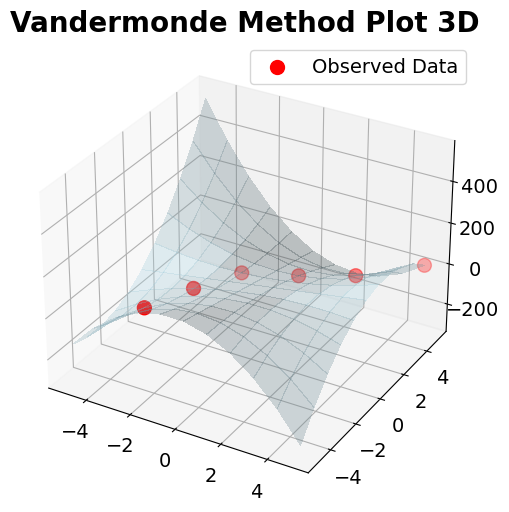

In [6]:
from hd_Interpolation_Algorithms import VanderCoefs3D

# A set of distinct points
xn = np.array ([-3, -2, -1, 1, 3, 5])
yn = np.array ([-3, -1, 1, 2, 3, 5])
zn = np.array ([-11 ,4 , 2 , -4 , 5, 10])

fn = lambda x, y: np.array([1, x, y, x*y, (x**2)*y, x*(y**2)])
cn = VanderCoefs3D(xn, yn, zn, fn)
# Vandermonde_Method_Plot_3D(xn, yn, zn, cn, fn)

import matplotlib.pyplot as plt

fontsize = 14
Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
plt.rcParams.update(Fig_Params)

fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-5,6), np.arange(-5, 6), indexing='xy')
z = np.zeros(x.shape)
for (i,j),_ in np.ndenumerate(z):
        z[i,j] = fn(x[i,j], y[i,j])@cn

# Plot the surface.
surf = ax.plot_surface(x, y, z, color = 'lightblue', linewidth=0, antialiased=False, alpha = 0.3)
_ = ax.scatter(xn, yn, zn, marker= 'o', s =100, c = 'red', zorder = 2, label = 'Observed Data')
_ = ax.legend()
_ = ax.set_title('Vandermonde Method Plot 3D', fontsize = 20, weight = 'bold')